# 機械学習の前処理を行なう

## 機械学習で予測する Data を設定しよう

In [1]:
import seaborn as sns
dataset = sns.load_dataset('titanic')
dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


- 先頭の survived が生還したのかの情報。
- 機械学習は、実際に起きた過去の情報をもとに、こういった場合は生還できるのかを予測することになる。
- もし海難事故にあった場合どういった顧客が生存できるのかを予測する Model を作る。
- 目的変数（予測する対象）: survived
- 説明変数（予測するために使う Data）: 中身を分析しながら目的変数に寄与する変数を選定していく

In [2]:
# 目的変数を Label として分ける
label = dataset.pop('survived')  # DataFrame.pop() を使って１列のみ取り出す
label

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

- 目的変数を明確に分けておくことで、説明変数の吟味がよりやりやすくなる。
- 目的変数を y と定義し、説明変数を x と定義することもある。
- 目的変数を分けるという作業は教師あり学習特有の作業になる。
- 分類では label という名前を使うことが多く、回帰では y　を使うことが多い。

## Train data と Test data に分割しよう

- 機械学習では、Train data のみで学習を行ない、Test data で精度の評価を行なうことが多い。
- Data の分割も教師あり学習特有の Task.
- Data の分割方法は多岐にわたり、Data の件数や機械学習Model の要件等によっても変わってくる。
    - Train / Test の２分割
    - Train / Test / Validation の３分割を Random に抽出
    - 交差検証法（５分割したうえで１つずつ Test data をずらしながら、学習、評価を実施していく）

今回は、最も Simple な２分割に分けていく。

In [3]:
from sklearn.model_selection import train_test_split
train_ds, test_ds, train_label, test_label = train_test_split(dataset, label, random_state=2021, stratify=label)

train_test_split() で Data分割が可能。Default で train:test = 7:3 となるようになっている。
- random_state=: Random Data の値を固定
- stratify=: 均等に分割したい Data を指定。多くは目的変数にすることが多い。

In [4]:
train_ds

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
293,3,female,24.0,0,0,8.8500,S,Third,woman,False,NaN,Southampton,no,True
201,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False
322,2,female,30.0,0,0,12.3500,Q,Second,woman,False,NaN,Queenstown,yes,True
266,3,male,16.0,4,1,39.6875,S,Third,man,True,NaN,Southampton,no,False
540,1,female,36.0,0,2,71.0000,S,First,woman,False,B,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,1,female,32.0,0,0,76.2917,C,First,woman,False,D,Cherbourg,yes,True
800,2,male,34.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
68,3,female,17.0,4,2,7.9250,S,Third,woman,False,NaN,Southampton,yes,False
92,1,male,46.0,1,0,61.1750,S,First,man,True,E,Southampton,no,False


In [5]:
test_ds

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
404,3,female,20.0,0,0,8.6625,S,Third,woman,False,NaN,Southampton,no,True
521,3,male,22.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
130,3,male,33.0,0,0,7.8958,C,Third,man,True,NaN,Cherbourg,no,True
14,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
610,3,female,39.0,1,5,31.2750,S,Third,woman,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,3,male,23.0,0,0,7.8542,S,Third,man,True,NaN,Southampton,no,True
238,2,male,19.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
824,3,male,2.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
486,1,female,35.0,1,0,90.0000,S,First,woman,False,C,Southampton,yes,False


Train data: 668, Test data: 223 と、およそ７対３に分割できている。

## Data を機械学習に適した形式へ変換しよう

- 機械学習をする際には、使用する変数や Data形式に注意が必要し、機械学習に適した Data に変える必要がある。
- 機械学習で明らかに使用すべきではない変数
    1. 目的変数と直接的に関係のある Data
    2. 長さ\[cm]、長さ\[m] のように説明変数間で同じ Data である変数。
    ※ 特に、目的変数と直接的に関係のある Data は必ず除外する必要がある。

今回の Data では、
1.): alive
2.): emdark_town（emdarked）と同じ事柄を表す Data

In [6]:
train_ds.drop(columns=['embark_town', 'alive'], inplace=True)  # DataFrame.drop() で２つの変数名を指定して削除
train_ds.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alone
293,3,female,24.0,0,0,8.8500,S,Third,woman,False,NaN,True
201,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,False
322,2,female,30.0,0,0,12.3500,Q,Second,woman,False,NaN,True
266,3,male,16.0,4,1,39.6875,S,Third,man,True,NaN,False
540,1,female,36.0,0,2,71.0000,S,First,woman,False,B,False


- 機械学習においては、通常は文字列をそのまま扱うことはできない為、変数として使用したい場合は何らかの方法で数値Data に変換する必要がある。
- One-hot encoding（文字列を横に持たせて Flag を立てる）

In [7]:
# One-hot encoding
import pandas as pd
one_hot_encoded = pd.get_dummies(train_ds)  # pandas.get_dummies()で文字列Data が横
one_hot_encoded.head()

,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,...,who_child,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
293,3,24.0,0,0,8.8500,False,True,1,0,0,...,0,0,1,0,0,0,0,0,0,0
201,3,NaN,8,2,69.5500,True,False,0,1,0,...,0,1,0,0,0,0,0,0,0,0
322,2,30.0,0,0,12.3500,False,True,1,0,0,...,0,0,1,0,0,0,0,0,0,0
266,3,16.0,4,1,39.6875,True,False,0,1,0,...,0,1,0,0,0,0,0,0,0,0
540,1,36.0,0,2,71.0000,False,False,1,0,0,...,0,0,1,0,1,0,0,0,0,0


- このような文字列Data を Categorical変数と呼ぶ
- Categorical変数を横持ちにした場合、１つ列を消すことが多い。

- label encoding（単に重複を避けて文字に id を振る方法）

In [8]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoded = train_ds.copy()
class_encoder = LabelEncoder()  # LabelEncoder を宣言
label_encoded['class'] = class_encoder.fit_transform(label_encoded['class'])  # .fit_transform() を用いて class列を作成
label_encoded.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alone
293,3,female,24.0,0,0,8.8500,S,2,woman,False,NaN,True
201,3,male,NaN,8,2,69.5500,S,2,man,True,NaN,False
322,2,female,30.0,0,0,12.3500,Q,1,woman,False,NaN,True
266,3,male,16.0,4,1,39.6875,S,2,man,True,NaN,False
540,1,female,36.0,0,2,71.0000,S,0,woman,False,B,False


- label encoding では、もともと文字列だった情報が数値Data に置き換わることで、順番や大小関係の情報が付加されてしまう
- 欠損値: { label encoding: その他の文字列と同様に扱われてしまう。, One-hot encoding: 欠損があってもなくても影響は変わらない。 }

pclass は数値 Data だが、Categorical な Data に分類されるため、One-hot encoding を摘要する。

In [9]:
one_hot_encoded = pd.get_dummies(one_hot_encoded, columns=['pclass'])  # get_dummies()は、columns= を指定することで特定の列のみ適用できる
one_hot_encoded.head()

,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,pclass_1,pclass_2,pclass_3
293,24.0,0,0,8.8500,False,True,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,NaN,8,2,69.5500,True,False,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
322,30.0,0,0,12.3500,False,True,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
266,16.0,4,1,39.6875,True,False,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
540,36.0,0,2,71.0000,False,False,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


True, False もそのまま学習することはできないため、それぞれ数字の 1, 0 に変換する。

In [10]:
one_hot_encoded = one_hot_encoded.replace({True: 1, False: 0})
one_hot_encoded.head()

,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,pclass_1,pclass_2,pclass_3
293,24.0,0,0,8.8500,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,NaN,8,2,69.5500,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
322,30.0,0,0,12.3500,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
266,16.0,4,1,39.6875,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
540,36.0,0,2,71.0000,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


変数の前処理は終了。最後に変数名を train_ds に戻しておく。

In [11]:
train_ds = one_hot_encoded

- Data 形式の変換は、実際には分析も行ないながら変数を選択していく。
- 目的変数に寄与しそうな説明変数を選んだり作成するのと同時に、不要な説明変数を省くことが機械学習Model の精度にも影響してくる。
- 変数を決定していく作業を特徴量Engineering と言う。
- 特徴量Engineering は、機械学習Model においては非常に重要な部分になる。

- 機械学習をする際には、使用する変数や Data形式に注意が必要し、機械学習に適した Data に変える必要がある。
- 機械学習で明らかに使用すべきではない変数
    1. 目的変数と直接的に関係のある Data
    2. 長さ\[cm]、長さ\[m] のように説明変数間で同じ Data である変数。
    ※ 特に、目的変数と直接的に関係のある Data は必ず除外する必要がある。

今回の Data では、
1.): alive
2.): emdark_town（emdarked）と同じ事柄を表す Data

- label encoding では、もともと文字列だった情報が数値Data に置き換わることで、順番や大小関係の情報が付加されてしまう
- 欠損値: { label encoding: その他の文字列と同様に扱われてしまう。, One-hot encoding: 欠損があってもなくても影響は変わらない。 }

## 外れ値の検出をしよう

#### 何をもって外れ値か？
- 統計的に標準の Sample とは大きくかけ離れている値を外れ値ということが多い。
- Sencer の異常や人的 Miss による明らかに異常な値は異常値という
- 人が見てすぐに判断できない場合は、統計的な手法を用いて解析を行う。

#### 機械学習Model における外れ値
Data の分布にもよるが、外れ値に引っ張られて精度がでない Case が多いので
- 除外
- 除外しなまでも把握

を行なう。

In [12]:
# 箱ひげIQR を用いた外れ値の検出。
# 値が下限を 1/4quantile より1.5IQR小さい値と上限を 3/4quantile より 1.5IQR 大きい値の間に収まっていない値を外れ値とする

In [13]:
q = train_ds.quantile([1 / 4, 3 / 4])
q1, q3 = q.loc[1 / 4], q.loc[3 / 4]
iqr = q3 - q1
mx = q3 + 1.5 * iqr
mn = q1 - 1.5 * iqr

In [14]:
((train_ds > mx) | (train_ds < mn)).sum()

age               4
sibsp            40
parch           164
fare             88
adult_male        0
alone             0
sex_female        0
sex_male          0
embarked_C      127
embarked_Q       58
embarked_S        0
class_First     164
class_Second    133
class_Third       0
who_child        64
who_man           0
who_woman         0
deck_A           11
deck_B           33
deck_C           45
deck_D           27
deck_E           24
deck_F            9
deck_G            2
pclass_1        164
pclass_2        133
pclass_3          0
dtype: int64

#### その他の外れ値の検出方法
- 正規化を用いた検出
- Clustering による検出
- 各変数を毎に外れ値を判断するのではなく、いくつかの変数を複合的に用いて判断する Case.

#### 外れ値を検出した後
- なんらかの処理を施すか否かを決める
  - 処理をする場合
    - 外れ値を含む Data を学習 Dataset から除外する。
    - 値を補正する。

実際の現場では Model の精度を見ながら外れ値を除外する Case もある。

## Data の分布をみて Scaling手法を考えよう

#### Scaling とは？
異なる Data を同じ範囲に統一していくこと。
Data の範囲を揃える方法は、Data の分布によって違う。

In [15]:
# Data の分布を確認する前に、各変数の基本統計量を確認しておく。
train_ds.describe()

,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,pclass_1,pclass_2,pclass_3
count,531.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,...,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,29.694124,0.546407,0.390719,32.485822,0.600299,0.601796,0.353293,0.646707,0.19012,0.086826,...,0.016467,0.049401,0.067365,0.040419,0.035928,0.013473,0.002994,0.245509,0.199102,0.555389
std,14.569037,1.153550,0.807594,49.198142,0.490204,0.489895,0.478351,0.478351,0.39269,0.281791,...,0.127358,0.216867,0.250841,0.197088,0.186250,0.115375,0.054677,0.430711,0.399624,0.497295
min,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.250000,0.000000,0.000000,7.925000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000,15.047900,1.000000,1.000000,0.000000,1.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,39.000000,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


train_ds で数値に意味のある Data は
- age
- sibsp
- parch
- fare

それぞれの数値は値の Scale が異なる。
複数の特徴をそのまま Model学習させると、大きい Scale に引っ張られてしまい、小さな Scale の特徴が予測結果に寄与しにくくなるということが起こる。
そのため、一般に数値Data は大小関係の情報を保持したまま、小さな値へ Scale するという処理が必要になる。

#### Scaling手法
どの手法が適しているか、Data の分布によってある程度は判断することが可能。
- 一様分布: 最小値を0, 最大値を1 に収める正規化
- 正規分布: 平均を0, 分散を1 にする標準化
- 上記分布でもないような分布、外れ値が含まれている分布: Robust scaring（※採用されることが多い）

(array([547.,  80.,  25.,   1.,   8.,   5.,   0.,   0.,   0.,   2.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

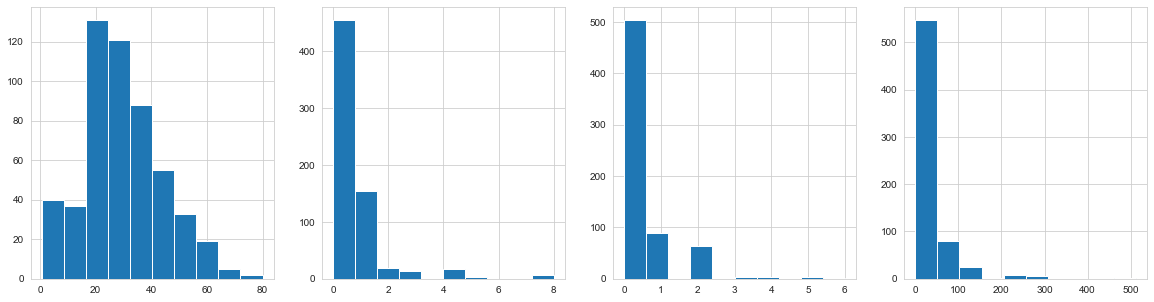

In [16]:
# age, sibsp, parch, fare ４つの変数の分布を可視化
import matplotlib .pyplot as plt
fig, axes = plt.subplots(ncols=4, figsize=(20, 5))
axes[0].hist(train_ds.age)
axes[1].hist(train_ds.sibsp)
axes[2].hist(train_ds.parch)
axes[3].hist(train_ds.fare)

fare は視覚的に明らかに正規分布ではないことが判る。
正確に判断するために、統計学の検定を使用する
- 一様分布の判定: χ二乗検定
- 正規分布の判定:  Shapiro-Wilk検定

検定によって算出される p値が有意水準を超えるのかどうかで分布の確からしさを判定する。
ここでは、有意水準を 0.05 とする

In [17]:
# age における χ二乗検定
from scipy import stats
import numpy as np
bins, bin_edges = np.histogram(train_ds['age'].dropna(), bins='auto')
stat, p = stats.chisquare(bins)
f"χ二乗検定の p値: {p}"

'χ二乗検定の p値: 3.4564391399825767e-66'

age は、p値 >= 0.05 ではないので一様性はない

In [18]:
# age における Shapiro-Wilk検定
stat, p = stats.shapiro(bins)
f"Shapiro-Wilk検定の p値: {p}"

'Shapiro-Wilk検定の p値: 0.07798287272453308'

age は、p値 >= 0.05 なので、正規性がある

In [19]:
# sidsp の検定
bins, bin_edges = np.histogram(train_ds['sibsp'].dropna(), bins='auto')
stat, p = stats.chisquare(bins)
print(f"χ二乗検定の p値: {p}")

stat, p = stats.shapiro(bins)
print(f"Shapiro-Wilk検定の p値: {p}")

χ二乗検定の p値: 0.0
Shapiro-Wilk検定の p値: 3.933027081098883e-12


sibsp:
- χ二乗検定の p値 >= 0.05 ではないので一様性はない。
- Shapiro-Wilk検定の p値 >= 0.05 ではないので正規性はない

In [20]:
# parch の検定
bins, bin_edges = np.histogram(train_ds['parch'].dropna(), bins='auto')
stat, p = stats.chisquare(bins)
print(f"χ二乗検定の p値: {p}")

stat, p = stats.shapiro(bins)
print(f"Shapiro-Wilk検定の p値: {p}")

χ二乗検定の p値: 0.0
Shapiro-Wilk検定の p値: 7.424870887007273e-07


parch:
- χ二乗検定の p値 >= 0.05 ではないので一様性はない。
- Shapiro-Wilk検定の p値 >= 0.05 ではないので正規性はない。

In [21]:
# fare の検定
bins, bin_edges = np.histogram(train_ds['fare'].dropna(), bins='auto')
stat, p = stats.chisquare(bins)
print(f"χ二乗検定の p値: {p}")

stat, p = stats.shapiro(bins)
print(f"Shapiro-Wilk検定の p値: {p}")

χ二乗検定の p値: 0.0
Shapiro-Wilk検定の p値: 5.63639770794382e-20


fare:
- χ二乗検定の p値 >= 0.05 ではないので一様性はない。
- Shapiro-Wilk検定の p値 >= 0.05 ではないので正規性はない。

Data の分布を可視化するだけではなく、検定を用いることで客観的に Data の分布をしることができる。